# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: fixed vs dynamic learning rate
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import warnings
warnings.filterwarnings('ignore')

# Function and its derivative

In [2]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

# Fixed Learning Rate

In [3]:
fixedLR = np.zeros((100, 3))
localmin = np.random.choice(1,1)

learning_rate = .01
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

  fixedLR[i, 0] = localmin
  fixedLR[i, 1] = grad
  fixedLR[i, 2] = learning_rate

# Learning Rate Schedules

In [4]:
scheduledLR = np.zeros((100, 3))
localmin = np.random.choice(1,1)

decay_rate = 0.01
init_learning_rate = .01
training_epochs = 100

for i in range(training_epochs):

  learning_rate = init_learning_rate * np.exp(-decay_rate*i)
    
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

  scheduledLR[i,0], scheduledLR[i, 1], scheduledLR[i,2] = localmin, grad, learning_rate

# Adaptive Learning Rate

In [5]:
adaptiveLR = np.zeros((100,3))
localmin = np.random.choice(1,1)

learning_rate = 0.01
momentum = 0.9
velocity = 0
training_epochs = 100

for i in range(training_epochs):
    grad = deriv(localmin)
    velocity = momentum*velocity - learning_rate*grad
    localmin = localmin + velocity
    
    adaptiveLR[i,0], adaptiveLR[i, 1], adaptiveLR[i,2] = localmin, grad, learning_rate

# RMSprop

In [11]:
RMSprop = np.zeros((100,3))
localmin = np.random.choice(1, 1)

learning_rate = 0.01
gamma = 0.9
Eg = 0
epsilon = 1e-8
training_epochs = 100

for i in range(training_epochs):
    grad = deriv(localmin)
    Eg = gamma * Eg + (1 - gamma) * grad**2
    adaptive_lr = learning_rate / (np.sqrt(Eg) + epsilon)
    localmin = localmin - adaptive_lr * grad
    RMSprop[i,0], RMSprop[i, 1], RMSprop[i,2] = localmin, grad, adaptive_lr

# Plot results

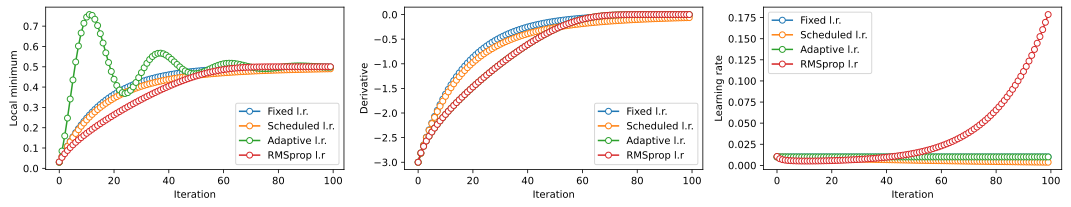

In [12]:
fig,ax = plt.subplots(1,3,figsize=(15,3))

for i in range(3):
  ax[i].plot(fixedLR[:,i],'o-',markerfacecolor='w')
  ax[i].plot(scheduledLR[:,i],'o-',markerfacecolor='w')
  ax[i].plot(adaptiveLR[:,i],'o-',markerfacecolor='w')
  ax[i].plot(RMSprop[:,i], 'o-', markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[0].legend(['Fixed l.r.','Scheduled l.r.','Adaptive l.r.', 'RMSprop l.r'])
ax[1].set_ylabel('Derivative')
ax[1].legend(['Fixed l.r.','Scheduled l.r.','Adaptive l.r.', 'RMSprop l.r'])
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Scheduled l.r.','Adaptive l.r.', 'RMSprop l.r'])

plt.tight_layout()
plt.show()